In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow


Found 437 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
Found 93 images belonging to 2 classes.
Epoch 1/10
14/14 [==============================] - 28s 2s/step - loss: 0.8278 - accuracy: 0.4645 - val_loss: 0.6824 - val_accuracy: 0.5368
Epoch 2/10
14/14 [==============================] - 24s 2s/step - loss: 0.6682 - accuracy: 0.5446 - val_loss: 0.6689 - val_accuracy: 0.5263
Epoch 3/10
14/14 [==============================] - 25s 2s/step - loss: 0.6160 - accuracy: 0.6773 - val_loss: 0.5610 - val_accuracy: 0.6947
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.5903 - accuracy: 0.6773 - val_loss: 0.5283 - val_accuracy: 0.7263
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.5348 - accuracy: 0.7597 - val_loss: 0.6016 - val_accuracy: 0.7579
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 0.4804 - accuracy: 0.7849 - val_loss: 0.4912 - val_accuracy: 0.8105
Epoch 7/10
14/14 [=====================

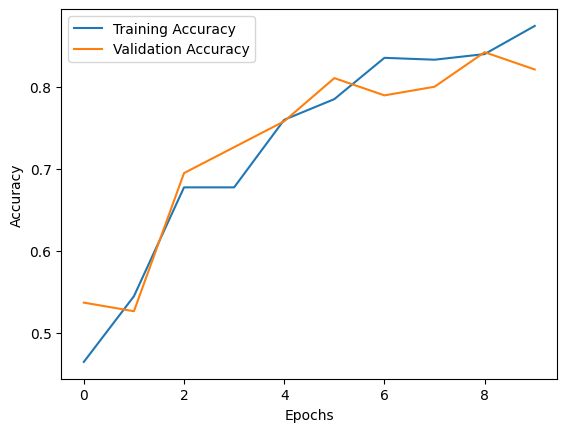

3/3 [==============================] - 4s 1s/step - loss: 0.3627 - accuracy: 0.8710
Test Loss: 0.36268603801727295
Test Accuracy: 0.8709677457809448
3/3 [==============================] - 4s 944ms/step


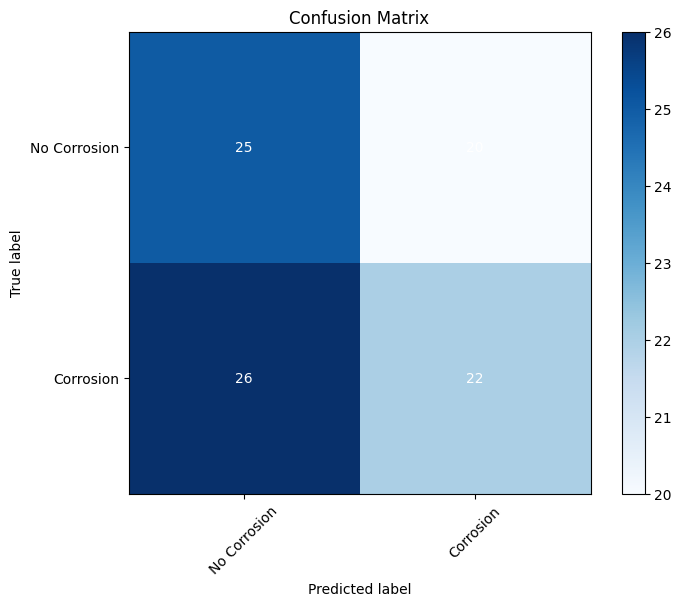

F1 Score: 0.4888888888888889


In [ ]:
# SIMPLE CNN - Non augmented
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 580s 10s/step - loss: 0.6763 - accuracy: 0.6104 - val_loss: 0.6317 - val_accuracy: 0.6342
Epoch 2/5
56/56 [==============================] - 206s 4s/step - loss: 0.4594 - accuracy: 0.7838 - val_loss: 0.5148 - val_accuracy: 0.7316
Epoch 3/5
56/56 [==============================] - 200s 4s/step - loss: 0.3953 - accuracy: 0.8187 - val_loss: 0.5014 - val_accuracy: 0.8158
Epoch 4/5
56/56 [==============================] - 205s 4s/step - loss: 0.3038 - accuracy: 0.8750 - val_loss: 0.4006 - val_accuracy: 0.8500
Epoch 5/5
56/56 [==============================] - 197s 3s/step - loss: 0.2828 - accuracy: 0.8880 - val_loss: 0.4416 - val_accuracy: 0.8263


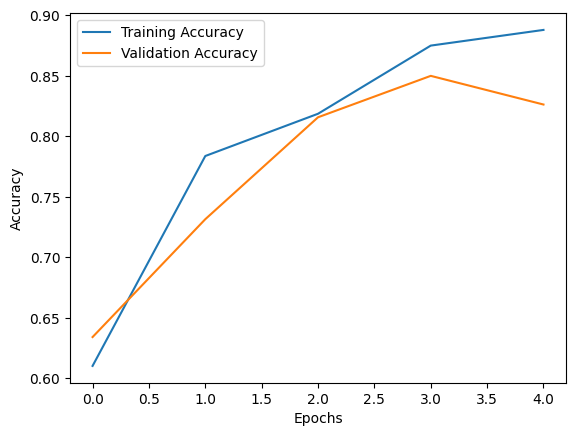

12/12 [==============================] - 144s 13s/step - loss: 0.2998 - accuracy: 0.8710
Test Loss: 0.2997899055480957
Test Accuracy: 0.8709677457809448
12/12 [==============================] - 24s 2s/step


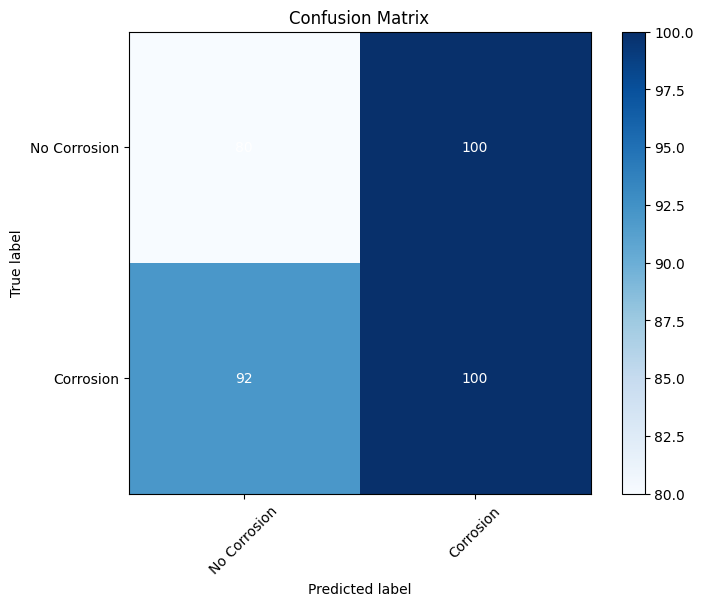

F1 Score: 0.5102040816326531


In [ ]:
# SIMPLE CNN - Augmented

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 234s 4s/step - loss: 3.0269 - accuracy: 0.5270 - val_loss: 1.8581 - val_accuracy: 0.6474 - lr: 9.0000e-04
Epoch 2/5
56/56 [==============================] - 210s 4s/step - loss: 1.4435 - accuracy: 0.6019 - val_loss: 1.1652 - val_accuracy: 0.7158 - lr: 8.1000e-04
Epoch 3/5
56/56 [==============================] - 214s 4s/step - loss: 1.0187 - accuracy: 0.6802 - val_loss: 0.8832 - val_accuracy: 0.6737 - lr: 7.2900e-04
Epoch 4/5
56/56 [==============================] - 214s 4s/step - loss: 0.8480 - accuracy: 0.6993 - val_loss: 0.8224 - val_accuracy: 0.6605 - lr: 6.5610e-04
Epoch 5/5
56/56 [==============================] - 208s 4s/step - loss: 0.7649 - accuracy: 0.7235 - val_loss: 0.7415 - val_accuracy: 0.7132 - lr: 5.9049e-04


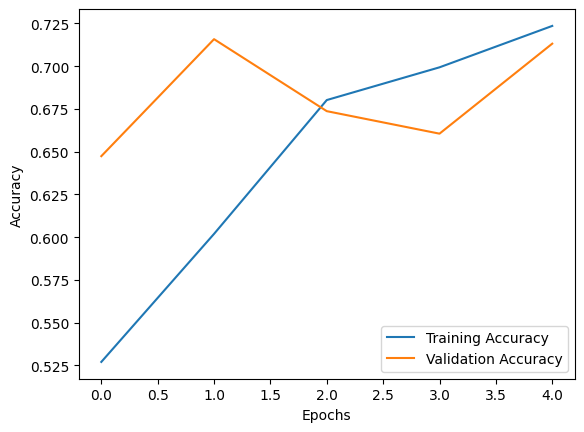

12/12 [==============================] - 29s 2s/step - loss: 0.6949 - accuracy: 0.7876
Test Loss: 0.6948920488357544
Test Accuracy: 0.7876344323158264
12/12 [==============================] - 26s 2s/step


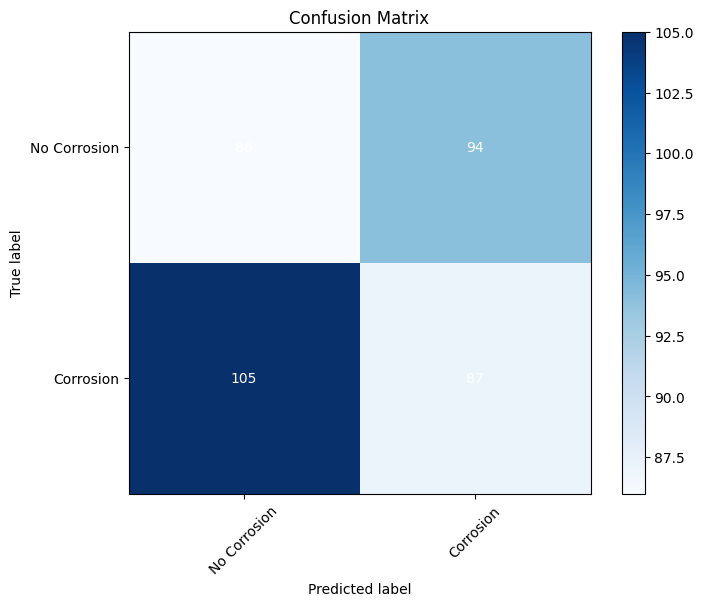

F1 Score: 0.46648793565683644


In [ ]:
# This code includes data augmentation, dropout layers, L2 regularization, a learning rate scheduler,
# early stopping, and increased training epochs to help avoid overfitting and improve accuracy.
#  (NOT NEEDED)
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32
epochs = 5

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5])

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Add dropout layer

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Add dropout layer

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Add dropout layer

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.9

lr_callback = LearningRateScheduler(lr_scheduler)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[lr_callback, early_stopping])

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')




Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 226s 4s/step - loss: 0.6972 - accuracy: 0.5113 - val_loss: 0.7159 - val_accuracy: 0.4842
Epoch 2/5
56/56 [==============================] - 206s 4s/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.7105 - val_accuracy: 0.3421
Epoch 3/5
56/56 [==============================] - 219s 4s/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.7106 - val_accuracy: 0.3711
Epoch 4/5
56/56 [==============================] - 209s 4s/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 5/5
56/56 [==============================] - 206s 4s/step - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.7083 - val_accuracy: 0.3342


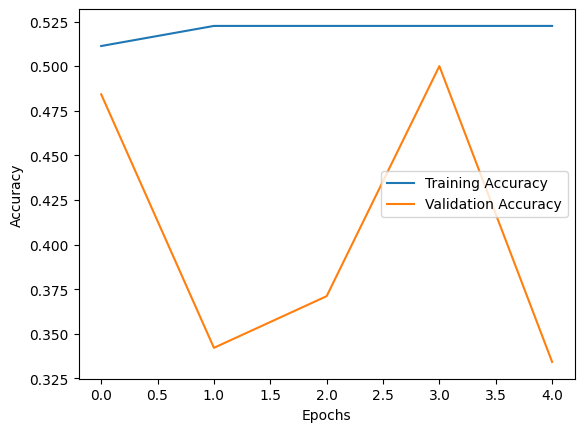

12/12 [==============================] - 36s 3s/step - loss: 0.7114 - accuracy: 0.3495
Test Loss: 0.7114219069480896
Test Accuracy: 0.3494623601436615
12/12 [==============================] - 25s 2s/step


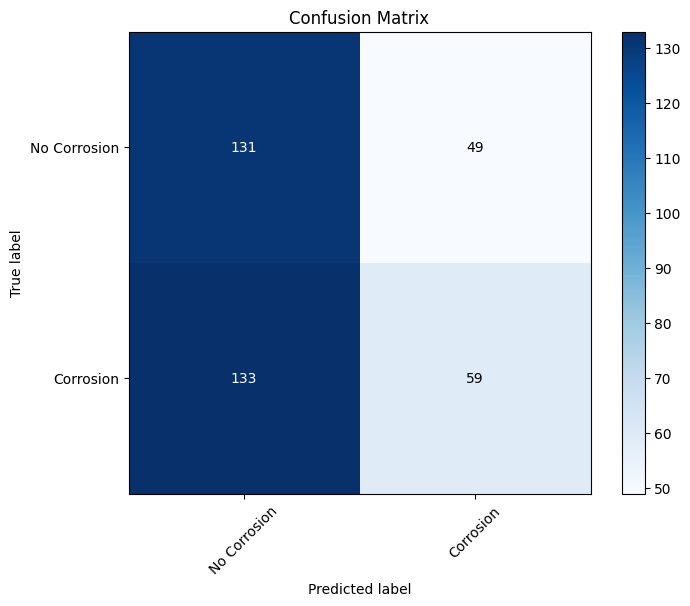

F1 Score: 0.3933333333333333


In [ ]:
# CNN + Histogram Equalization
# (NOT NEEDED)

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage import exposure  # Import the skimage library for histogram equalization

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
def histogram_equalization(image):
    # Apply histogram equalization to each color channel separately
    equalized_image = np.zeros_like(image)
    for channel in range(image.shape[-1]):
        equalized_image[..., channel] = exposure.equalize_hist(image[..., channel])
    return equalized_image

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=histogram_equalization)  # Apply histogram equalization to training data

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # Reduce the number of training epochs to 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

#Histogram Equalization

Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 225s 4s/step - loss: 0.6216 - accuracy: 0.6605 - val_loss: 0.6385 - val_accuracy: 0.6684
Epoch 2/5
56/56 [==============================] - 211s 4s/step - loss: 0.5261 - accuracy: 0.7494 - val_loss: 0.5937 - val_accuracy: 0.7079
Epoch 3/5
56/56 [==============================] - 211s 4s/step - loss: 0.5071 - accuracy: 0.7804 - val_loss: 0.5910 - val_accuracy: 0.7211
Epoch 4/5
56/56 [==============================] - 205s 4s/step - loss: 0.4148 - accuracy: 0.8288 - val_loss: 0.5428 - val_accuracy: 0.7658
Epoch 5/5
56/56 [==============================] - 205s 4s/step - loss: 0.4179 - accuracy: 0.8288 - val_loss: 0.6430 - val_accuracy: 0.7000


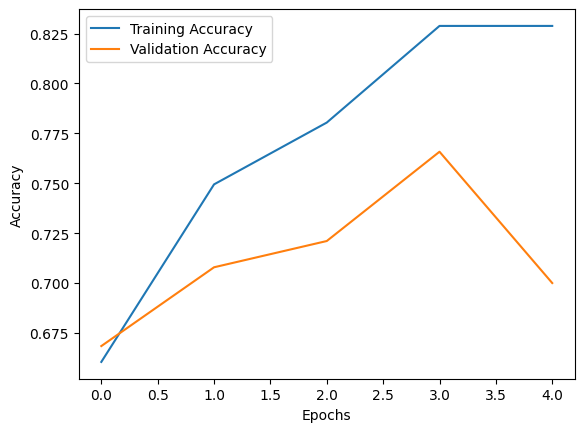

12/12 [==============================] - 36s 3s/step - loss: 0.5702 - accuracy: 0.7419
Test Loss: 0.5702323317527771
Test Accuracy: 0.7419354915618896
12/12 [==============================] - 24s 2s/step


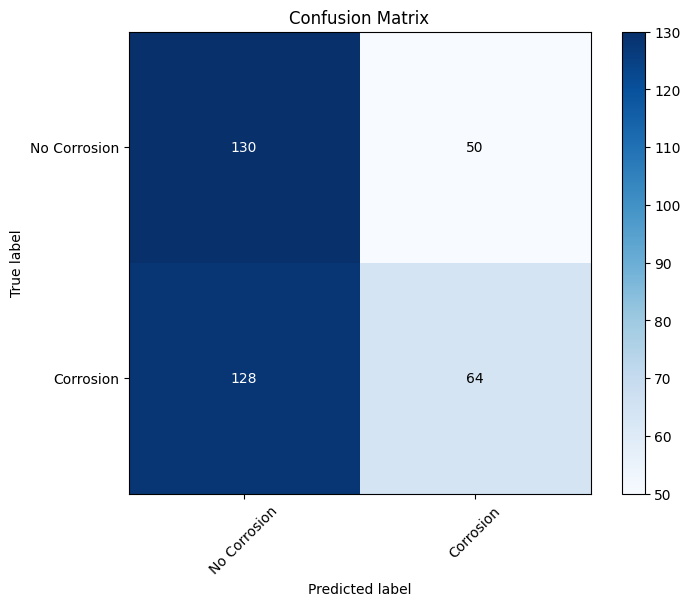

F1 Score: 0.41830065359477125


In [ ]:
# CNN + LSTM
# (NOT NEEDED)

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Dropout, TimeDistributed

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN-LSTM model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a TimeDistributed layer to reshape the output of CNN for LSTM
model.add(TimeDistributed(Flatten()))

# Add the LSTM layer
model.add(LSTM(64))  # Add an LSTM layer
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 222s 4s/step - loss: 0.6497 - accuracy: 0.6295 - val_loss: 0.5946 - val_accuracy: 0.6474
Epoch 2/5
56/56 [==============================] - 203s 4s/step - loss: 0.5629 - accuracy: 0.7111 - val_loss: 0.5396 - val_accuracy: 0.7316
Epoch 3/5
56/56 [==============================] - 208s 4s/step - loss: 0.4963 - accuracy: 0.7618 - val_loss: 0.5463 - val_accuracy: 0.7342
Epoch 4/5
56/56 [==============================] - 205s 4s/step - loss: 0.4548 - accuracy: 0.7939 - val_loss: 0.6529 - val_accuracy: 0.7553
Epoch 5/5
56/56 [==============================] - 211s 4s/step - loss: 0.3469 - accuracy: 0.8440 - val_loss: 1.0292 - val_accuracy: 0.6474


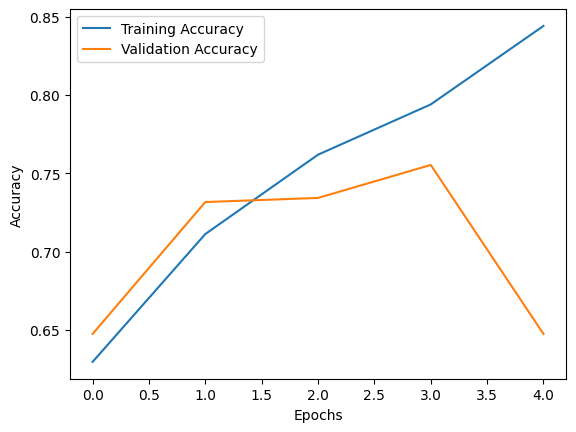

12/12 [==============================] - 26s 2s/step - loss: 0.9949 - accuracy: 0.6559
Test Loss: 0.9949322938919067
Test Accuracy: 0.6559139490127563
12/12 [==============================] - 27s 2s/step


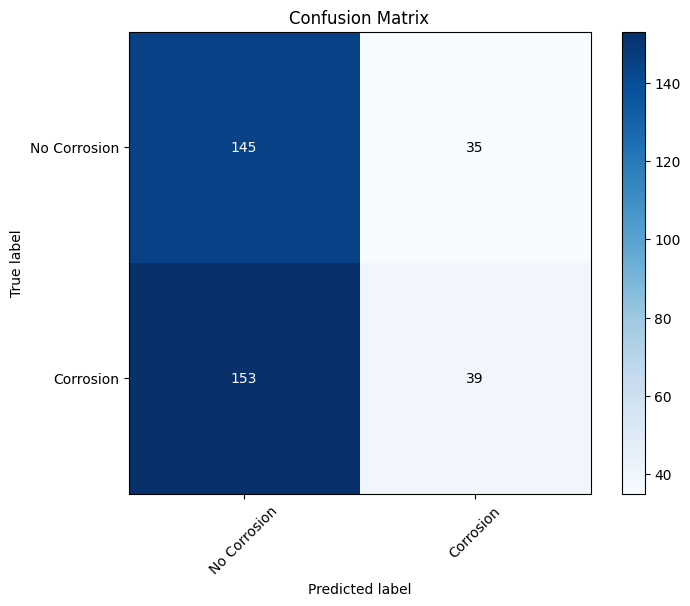

F1 Score: 0.2932330827067669


In [ ]:
# CNN + GRU
# (NOT NEEDED)

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, GRU

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN-GRU model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a TimeDistributed layer to reshape the output of CNN for GRU
model.add(TimeDistributed(Flatten()))

# Add the GRU layer
model.add(GRU(64))  # Add a GRU layer
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 228s 4s/step - loss: 0.6840 - accuracy: 0.5833 - val_loss: 0.6326 - val_accuracy: 0.6868
Epoch 2/5
56/56 [==============================] - 211s 4s/step - loss: 0.4828 - accuracy: 0.7759 - val_loss: 0.5645 - val_accuracy: 0.7579
Epoch 3/5
56/56 [==============================] - 222s 4s/step - loss: 0.3684 - accuracy: 0.8361 - val_loss: 0.8123 - val_accuracy: 0.6816
Epoch 4/5
56/56 [==============================] - 220s 4s/step - loss: 0.3086 - accuracy: 0.8671 - val_loss: 0.3956 - val_accuracy: 0.8526
Epoch 5/5
56/56 [==============================] - 210s 4s/step - loss: 0.2205 - accuracy: 0.9116 - val_loss: 0.4709 - val_accuracy: 0.8447


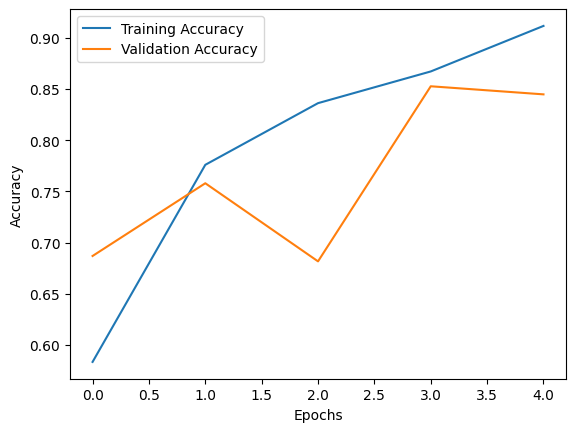

12/12 [==============================] - 29s 2s/step - loss: 0.4060 - accuracy: 0.8468
Test Loss: 0.40596193075180054
Test Accuracy: 0.8467742204666138
12/12 [==============================] - 30s 2s/step


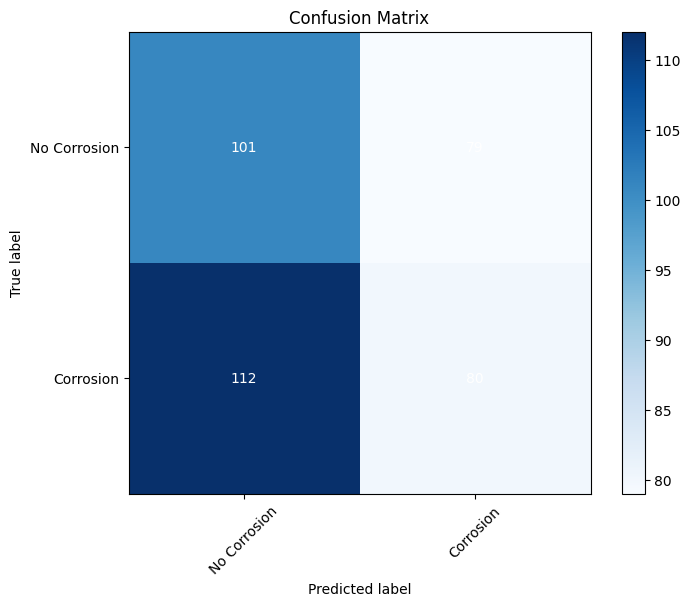

F1 Score: 0.4558404558404559
12/12 [==============================] - 27s 2s/step


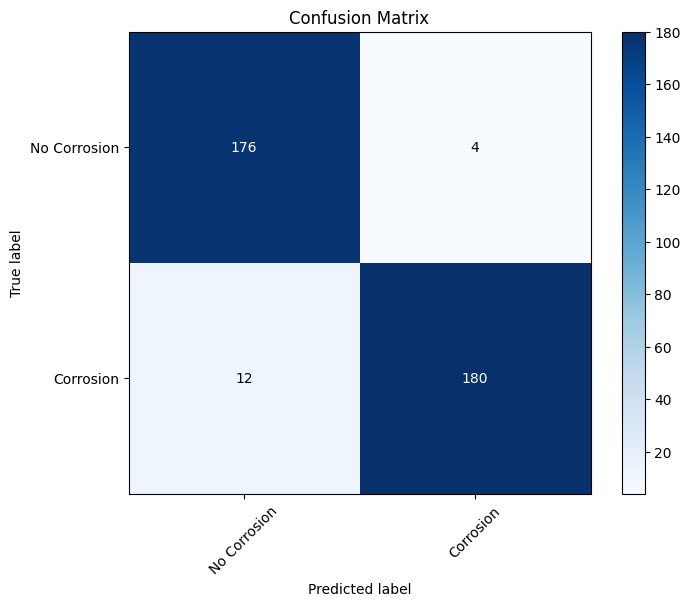

Random Forest F1 Score: 0.9574468085106383
Random Forest Accuracy: 95.70%


In [ ]:
# CNN + Random Forest Classifier

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')


# Code Explanation -
# Feature Extraction with CNN: Features are extracted from the test data using the trained CNN model. These features are representations of the test images in a high-dimensional space.

# Random Forest Classifier: A Random Forest classifier from sklearn.ensemble is created with 100 trees.
# The extracted CNN features are used as input for the Random Forest classifier.
# The Random Forest model is trained on these features.

# Predictions with Random Forest: The trained Random Forest classifier is used to make predictions on the test data using the extracted features.

Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 210s 4s/step - loss: 0.6380 - accuracy: 0.6284 - val_loss: 0.6078 - val_accuracy: 0.7053
Epoch 2/5
56/56 [==============================] - 203s 4s/step - loss: 0.4773 - accuracy: 0.7798 - val_loss: 0.5665 - val_accuracy: 0.7605
Epoch 3/5
56/56 [==============================] - 197s 4s/step - loss: 0.3945 - accuracy: 0.8226 - val_loss: 0.5107 - val_accuracy: 0.8132
Epoch 4/5
56/56 [==============================] - 207s 4s/step - loss: 0.3413 - accuracy: 0.8508 - val_loss: 0.4222 - val_accuracy: 0.8316
Epoch 5/5
56/56 [==============================] - 201s 4s/step - loss: 0.2529 - accuracy: 0.8975 - val_loss: 0.5112 - val_accuracy: 0.8421


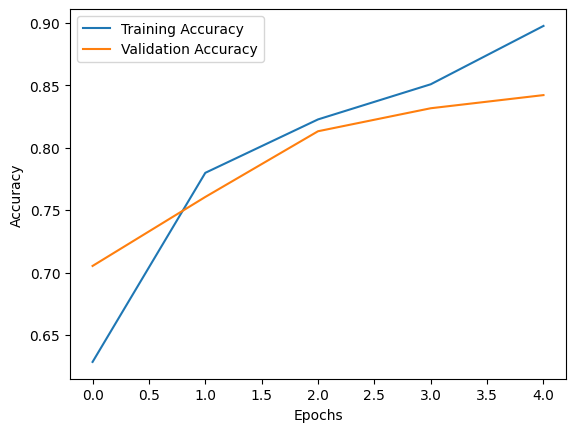

12/12 [==============================] - 30s 3s/step - loss: 0.3178 - accuracy: 0.8817
Test Loss: 0.31783631443977356
Test Accuracy: 0.8817204236984253
12/12 [==============================] - 23s 2s/step


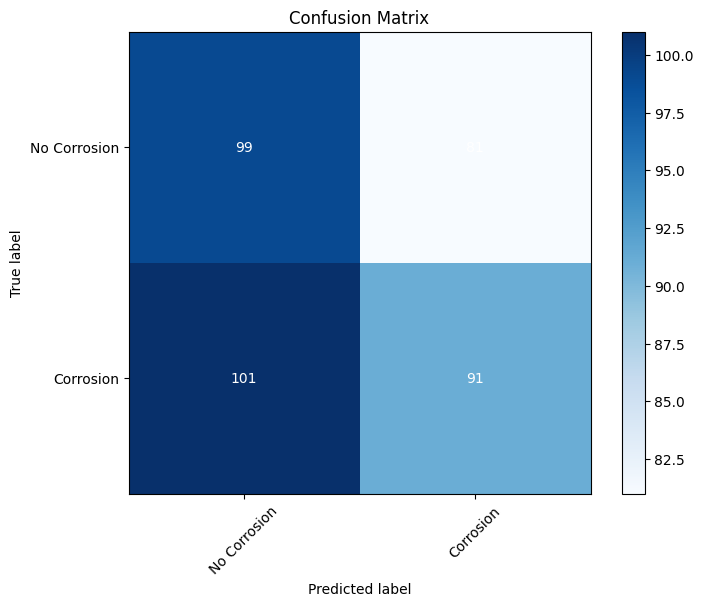

F1 Score: 0.5
12/12 [==============================] - 23s 2s/step


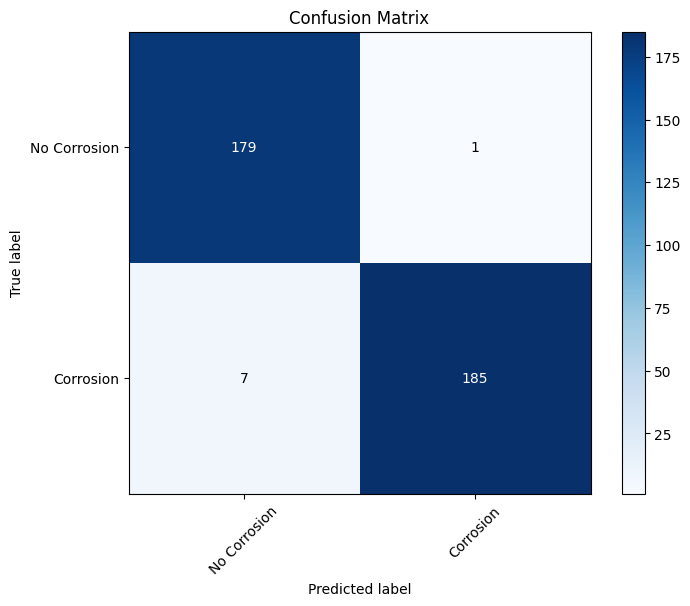

Random Forest F1 Score: 0.9788359788359788
Random Forest Accuracy: 97.85%
           Model  F1 Score
0            CNN  0.500000
1  Random Forest  0.978836


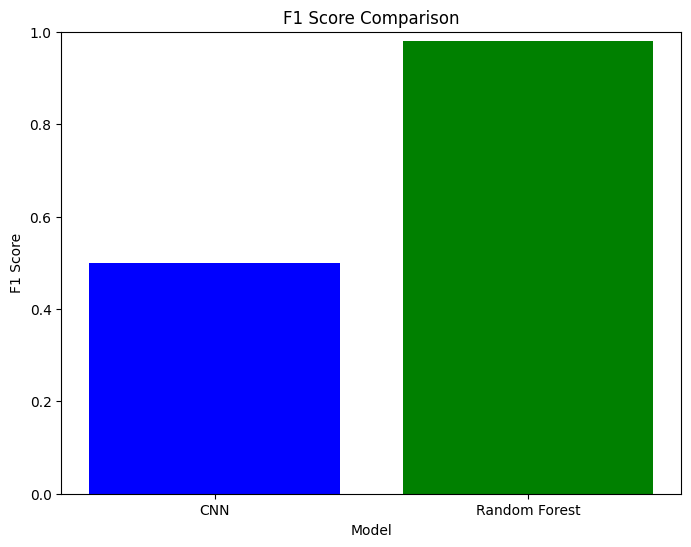

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Create a table to illustrate F1 score statistical analysis
f1_scores = pd.DataFrame({'Model': ['CNN', 'Random Forest'],
                          'F1 Score': [f1, rf_f1]})

# Print the F1 scores DataFrame
print(f1_scores)

# Plot F1 scores
plt.figure(figsize=(8, 6))
plt.bar(f1_scores['Model'], f1_scores['F1 Score'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to between 0 and 1 for better visualization
plt.show()


In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.4 MB/s eta 0:00:00


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 904s 16s/step - loss: 0.6757 - accuracy: 0.6143 - val_loss: 0.5517 - val_accuracy: 0.7132
Epoch 2/5
56/56 [==============================] - 186s 3s/step - loss: 0.4509 - accuracy: 0.7967 - val_loss: 0.4899 - val_accuracy: 0.7921
Epoch 3/5
56/56 [==============================] - 204s 4s/step - loss: 0.3368 - accuracy: 0.8457 - val_loss: 0.5705 - val_accuracy: 0.7474
Epoch 4/5
56/56 [==============================] - 214s 4s/step - loss: 0.2952 - accuracy: 0.8733 - val_loss: 0.4838 - val_accuracy: 0.8526
Epoch 5/5
56/56 [==============================] - 196s 4s/step - loss: 0.1911 - accuracy: 0.9229 - val_loss: 0.6433 - val_accuracy: 0.8026


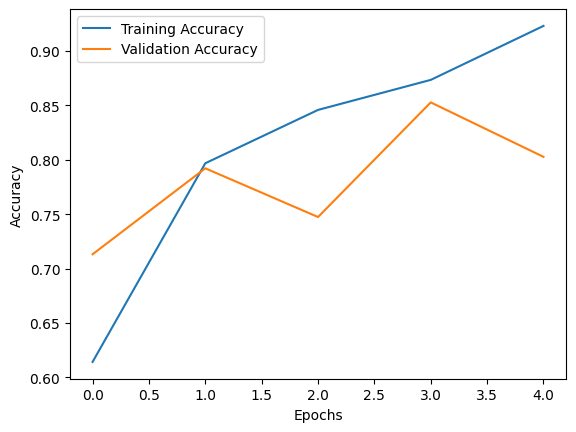

12/12 [==============================] - 210s 19s/step - loss: 0.4378 - accuracy: 0.8038
Test Loss: 0.43780645728111267
Test Accuracy: 0.8037634491920471
12/12 [==============================] - 26s 2s/step


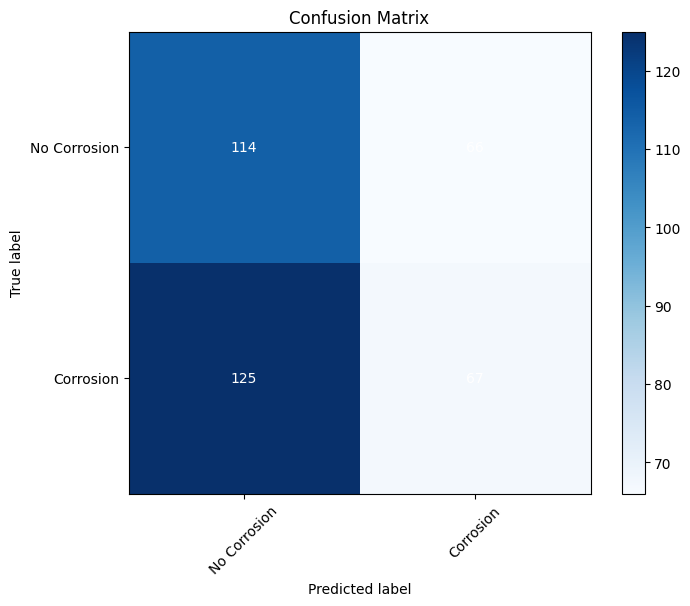

F1 Score: 0.41230769230769226
12/12 [==============================] - 25s 2s/step
Logistic Regression Accuracy: 0.5161290322580645
Logistic Regression F1 Score: 0.6808510638297872


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Flatten the predictions from the CNN model for input to logistic regression
y_pred_cnn = model.predict(test_generator)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

# Train the logistic regression model on the CNN predictions
logistic_regression_model.fit(y_pred_cnn, y_true)

# Make predictions using the logistic regression model
y_pred_logistic = logistic_regression_model.predict(y_pred_cnn)

# Calculate accuracy and F1 score for logistic regression
logistic_accuracy = accuracy_score(y_true, y_pred_logistic)
logistic_f1 = f1_score(y_true, y_pred_logistic)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression F1 Score: {logistic_f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 629s 11s/step - loss: 0.6833 - accuracy: 0.5704 - val_loss: 0.5937 - val_accuracy: 0.6763
Epoch 2/5
56/56 [==============================] - 195s 3s/step - loss: 0.5323 - accuracy: 0.7399 - val_loss: 0.4708 - val_accuracy: 0.8132
Epoch 3/5
56/56 [==============================] - 172s 3s/step - loss: 0.3901 - accuracy: 0.8294 - val_loss: 0.5584 - val_accuracy: 0.7737
Epoch 4/5
56/56 [==============================] - 193s 3s/step - loss: 0.3223 - accuracy: 0.8536 - val_loss: 0.6654 - val_accuracy: 0.7789
Epoch 5/5
56/56 [==============================] - 177s 3s/step - loss: 0.2287 - accuracy: 0.9003 - val_loss: 0.8705 - val_accuracy: 0.7711


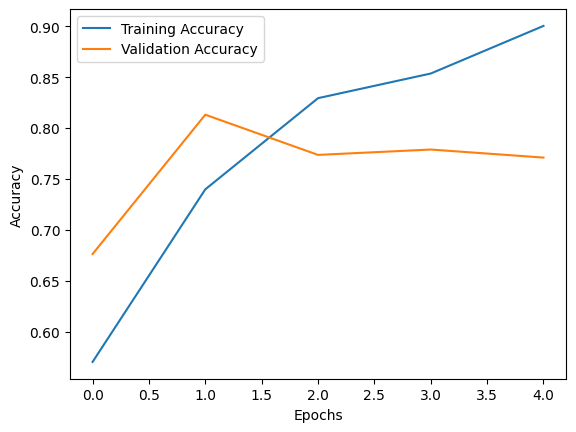

12/12 [==============================] - 151s 13s/step - loss: 0.6111 - accuracy: 0.7984
Test Loss: 0.6110855937004089
Test Accuracy: 0.7983871102333069
12/12 [==============================] - 24s 2s/step


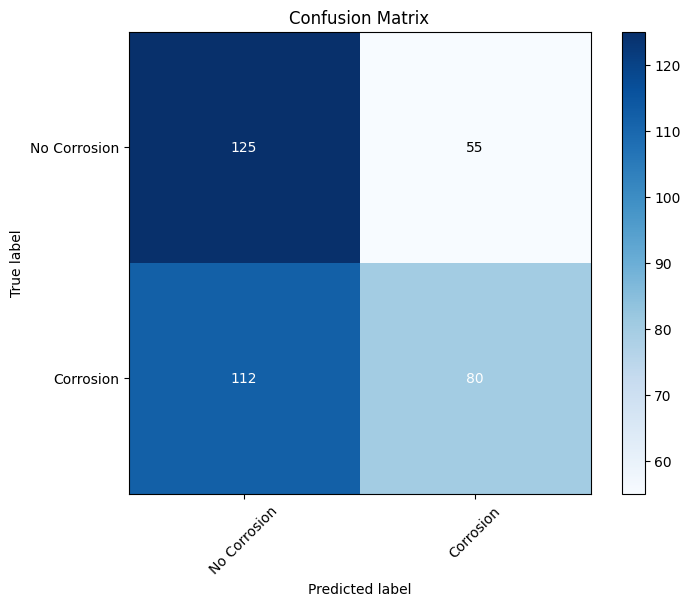

F1 Score: 0.48929663608562685
12/12 [==============================] - 24s 2s/step


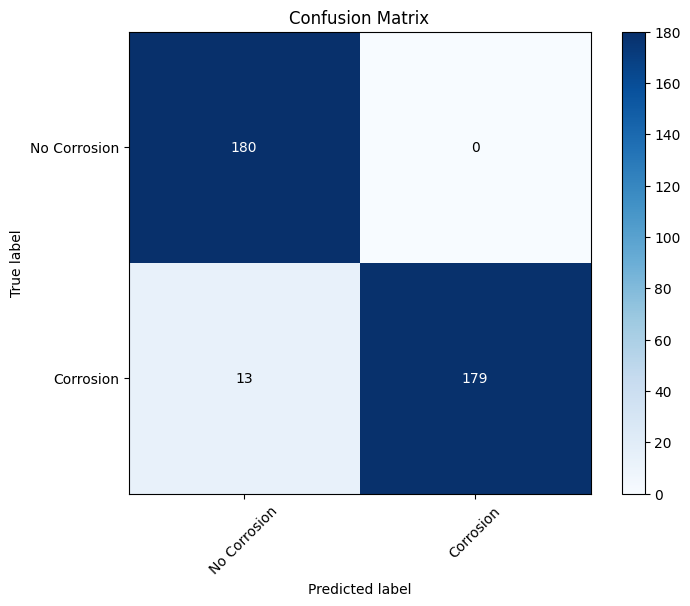

Random Forest F1 Score: 0.9649595687331537
Random Forest Accuracy: 96.51%
           Model  F1 Score
0            CNN  0.489297
1  Random Forest  0.964960


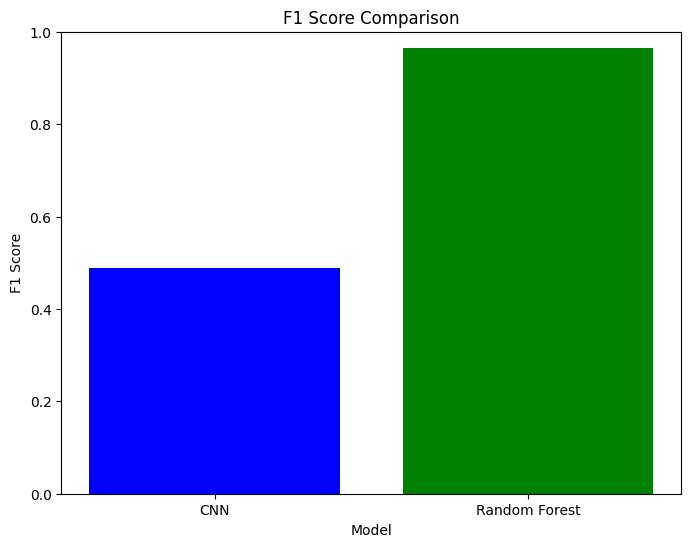

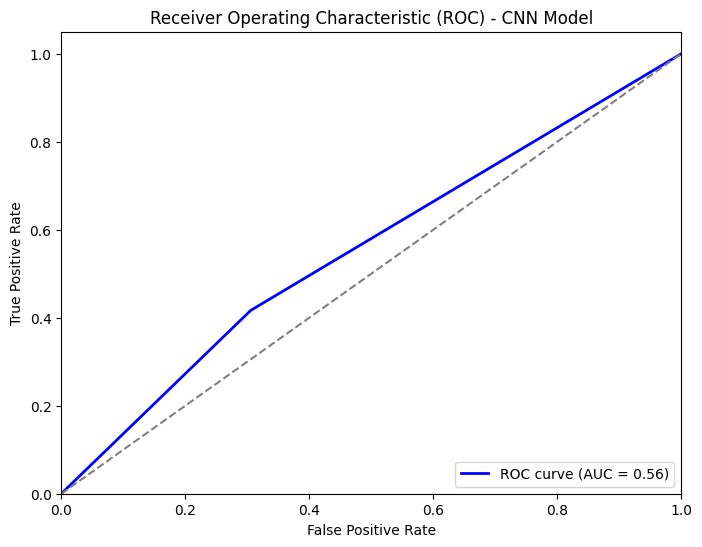

AUC for CNN Model: 0.56


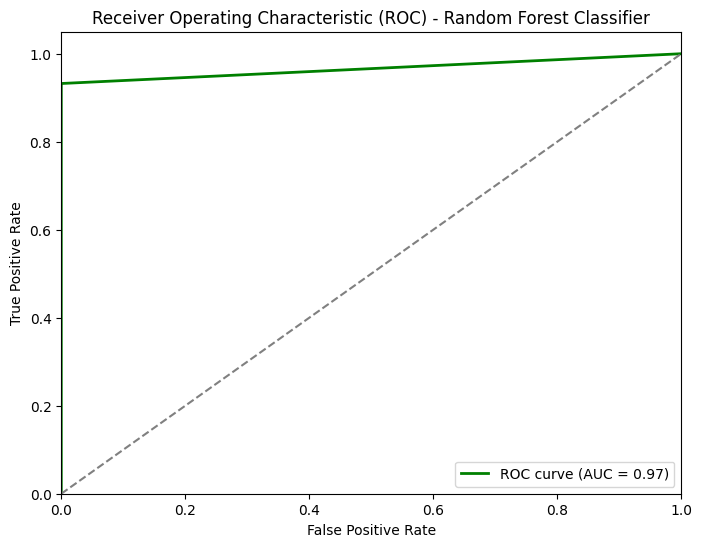

AUC for Random Forest Classifier: 0.97


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Create a table to illustrate F1 score statistical analysis
f1_scores = pd.DataFrame({'Model': ['CNN', 'Random Forest'],
                          'F1 Score': [f1, rf_f1]})

# Print the F1 scores DataFrame
print(f1_scores)

# Plot F1 scores
plt.figure(figsize=(8, 6))
plt.bar(f1_scores['Model'], f1_scores['F1 Score'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to between 0 and 1 for better visualization
plt.show()

# Calculate ROC curve for the CNN model
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_true, y_pred)

# Calculate AUC for the CNN model
auc_cnn = roc_auc_score(y_true, y_pred)

# Plot ROC curve for the CNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label=f'ROC curve (AUC = {auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - CNN Model')
plt.legend(loc='lower right')
plt.show()

print(f'AUC for CNN Model: {auc_cnn:.2f}')

# Calculate ROC curve for the Random Forest classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, rf_predictions)

# Calculate AUC for the Random Forest classifier
auc_rf = roc_auc_score(y_true, rf_predictions)

# Plot ROC curve for the Random Forest classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

print(f'AUC for Random Forest Classifier: {auc_rf:.2f}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 214s 4s/step - loss: 0.6560 - accuracy: 0.6470 - val_loss: 0.5279 - val_accuracy: 0.7158
Epoch 2/5
56/56 [==============================] - 207s 4s/step - loss: 0.4922 - accuracy: 0.7748 - val_loss: 0.4801 - val_accuracy: 0.7816
Epoch 3/5
56/56 [==============================] - 219s 4s/step - loss: 0.4009 - accuracy: 0.8305 - val_loss: 0.4430 - val_accuracy: 0.8158
Epoch 4/5
56/56 [==============================] - 199s 4s/step - loss: 0.3384 - accuracy: 0.8575 - val_loss: 0.3231 - val_accuracy: 0.8632
Epoch 5/5
56/56 [==============================] - 199s 4s/step - loss: 0.2761 - accuracy: 0.8919 - val_loss: 0.3475 - val_accuracy: 0.8632


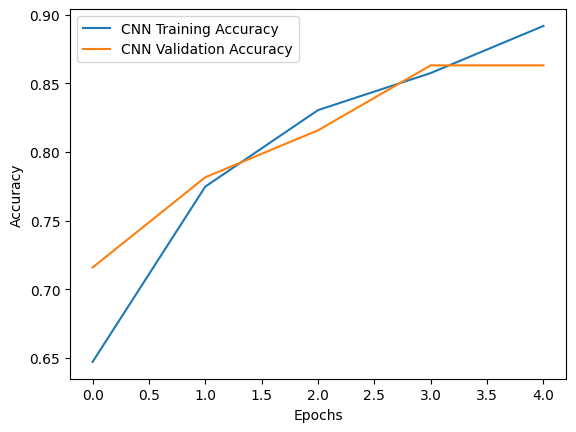

12/12 [==============================] - 27s 2s/step


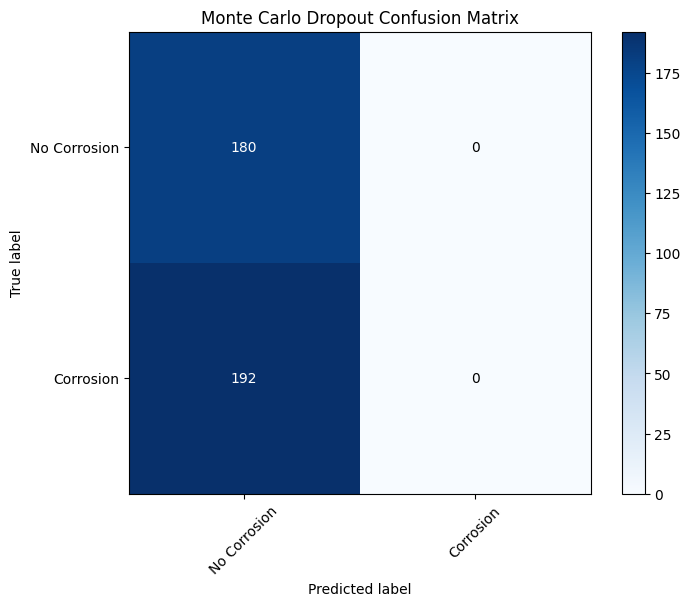

Monte Carlo Dropout F1 Score: 0.00
12/12 [==============================] - 26s 2s/step


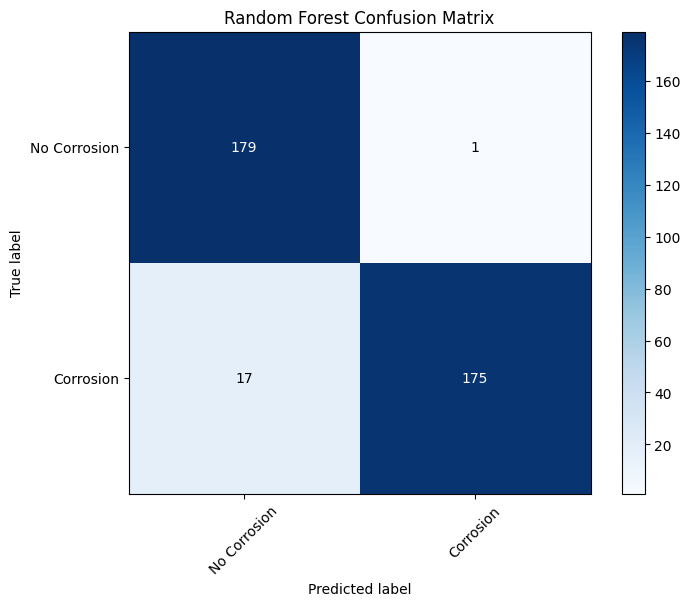

Random Forest F1 Score: 0.95
Random Forest Accuracy: 95.16%
                     Model  F1 Score
0  Monte Carlo Dropout CNN  0.000000
1            Random Forest  0.951087


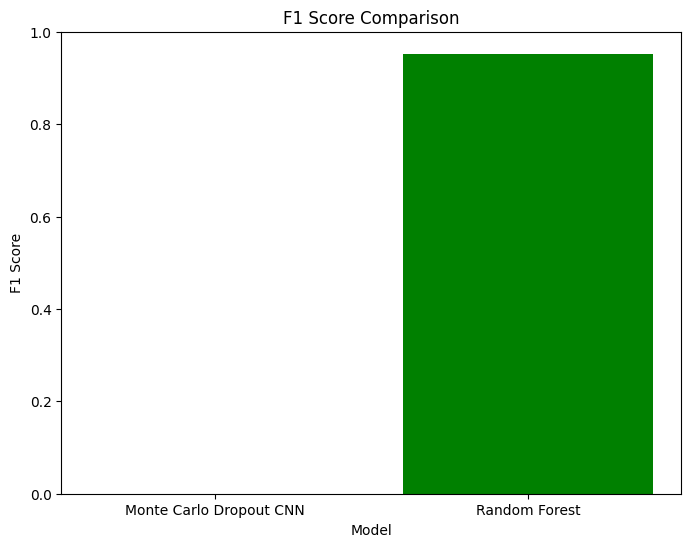

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model with Monte Carlo Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add a dropout layer with a dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history for the Monte Carlo Dropout model
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Perform Monte Carlo Dropout predictions
num_monte_carlo_samples = 50  # Number of Monte Carlo samples

def monte_carlo_dropout_predict(model, generator, num_samples):
    predictions = []
    for _ in range(num_samples):
        y_pred = model.predict(generator)
        predictions.append(y_pred)
    return predictions

monte_carlo_predictions = monte_carlo_dropout_predict(model, test_generator, num_monte_carlo_samples)

# Calculate mean and standard deviation of Monte Carlo Dropout predictions
monte_carlo_mean = np.mean(monte_carlo_predictions, axis=0)
monte_carlo_stddev = np.std(monte_carlo_predictions, axis=0)

# Set a threshold for uncertainty
threshold = 0.2

# Create binary predictions based on uncertainty threshold
binary_predictions = (monte_carlo_mean > 0.5).astype(int)

# Filter predictions based on uncertainty
filtered_predictions = binary_predictions * (monte_carlo_stddev < threshold).astype(int)

# Calculate the confusion matrix for Monte Carlo Dropout predictions
y_true = test_generator.classes
confusion_mc_dropout = confusion_matrix(y_true, filtered_predictions)

# Plot the confusion matrix for Monte Carlo Dropout
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']

# Print and plot confusion matrix for Monte Carlo Dropout
plot_confusion_matrix(confusion_mc_dropout, classes=class_names, title='Monte Carlo Dropout Confusion Matrix')

# Calculate and print F1 score for Monte Carlo Dropout
f1_mc_dropout = f1_score(y_true, filtered_predictions)
print(f'Monte Carlo Dropout F1 Score: {f1_mc_dropout:.2f}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the confusion matrix for Random Forest
plot_confusion_matrix(rf_confusion, classes=class_names, title='Random Forest Confusion Matrix')

# Calculate and print F1 score for Random Forest
f1_rf = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Create a table to illustrate F1 score comparison
f1_scores = pd.DataFrame({'Model': ['Monte Carlo Dropout CNN', 'Random Forest'],
                          'F1 Score': [f1_mc_dropout, f1_rf]})

# Print the F1 scores DataFrame
print(f1_scores)

# Plot F1 scores comparison
plt.figure(figsize=(8, 6))
plt.bar(f1_scores['Model'], f1_scores['F1 Score'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to between 0 and 1 for better visualization
plt.show()

# The "Monte Carlo Dropout CNN" represents the CNN model with Monte Carlo Dropout applied to estimate uncertainty.
# The "Random Forest" represents the Random Forest classifier used for comparison.
# The code calculates and prints the F1 scores for both models and presents the comparison in a bar chart. The F1 score is a metric that combines precision
# and recall and is useful for binary classification tasks like corrosion detection.



Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
56/56 [==============================] - 403s 7s/step - loss: 0.2202 - accuracy: 0.9043 - val_loss: 3.0491 - val_accuracy: 0.5158
Epoch 2/5
56/56 [==============================] - 358s 6s/step - loss: 0.0639 - accuracy: 0.9707 - val_loss: 2.9521 - val_accuracy: 0.5158
Epoch 3/5
56/56 [==============================] - 362s 6s/step - loss: 0.0506 - accuracy: 0.9797 - val_loss: 7.3377 - val_accuracy: 0.5158
Epoch 4/5
56/56 [==============================] - 363s 6s/step - loss: 0.0613 - accuracy: 0.9831 - val_loss: 0.8521 - val_accuracy: 0.4842
Epoch 5/5
56/56 [==============================] - 357s 6s/step - loss: 0.0469 - accuracy: 0.9848 - val_loss: 0.8311 - val_accuracy: 0.5211


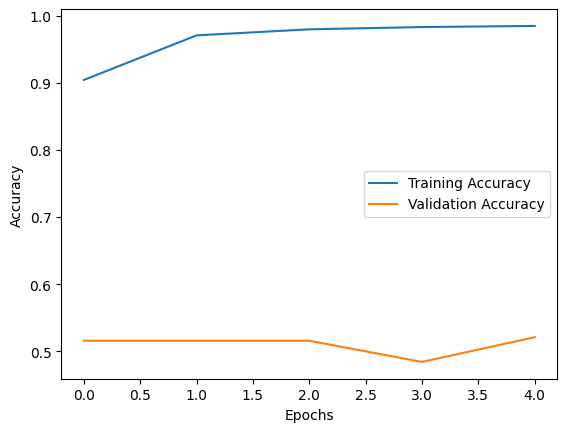

12/12 [==============================] - 31s 3s/step - loss: 0.8219 - accuracy: 0.5108
Test Loss: 0.8219292759895325
Test Accuracy: 0.5107526779174805
12/12 [==============================] - 33s 2s/step


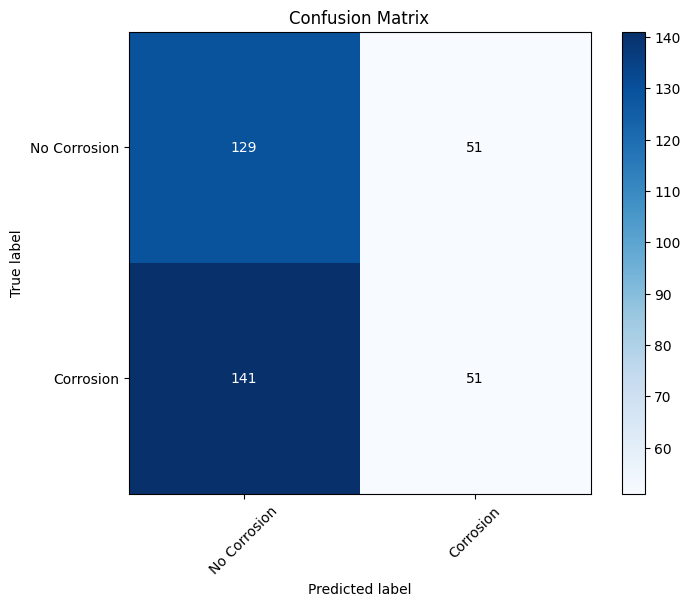

F1 Score: 0.3469387755102041


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build an EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 510s 9s/step - loss: 0.7068 - accuracy: 0.6143 - val_loss: 0.6044 - val_accuracy: 0.7184
Epoch 2/5
56/56 [==============================] - 195s 3s/step - loss: 0.5154 - accuracy: 0.7618 - val_loss: 0.6276 - val_accuracy: 0.7026
Epoch 3/5
56/56 [==============================] - 195s 3s/step - loss: 0.4552 - accuracy: 0.8007 - val_loss: 0.4378 - val_accuracy: 0.8053
Epoch 4/5
56/56 [==============================] - 199s 4s/step - loss: 0.3471 - accuracy: 0.8435 - val_loss: 0.4576 - val_accuracy: 0.8158
Epoch 5/5
56/56 [==============================] - 198s 4s/step - loss: 0.2676 - accuracy: 0.8812 - val_loss: 0.4048 - val_accuracy: 0.8579


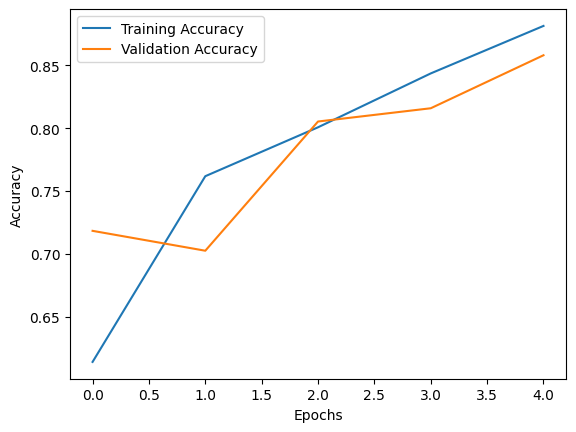

12/12 [==============================] - 109s 10s/step - loss: 0.2919 - accuracy: 0.8844
Test Loss: 0.2919369637966156
Test Accuracy: 0.8844085931777954
12/12 [==============================] - 24s 2s/step


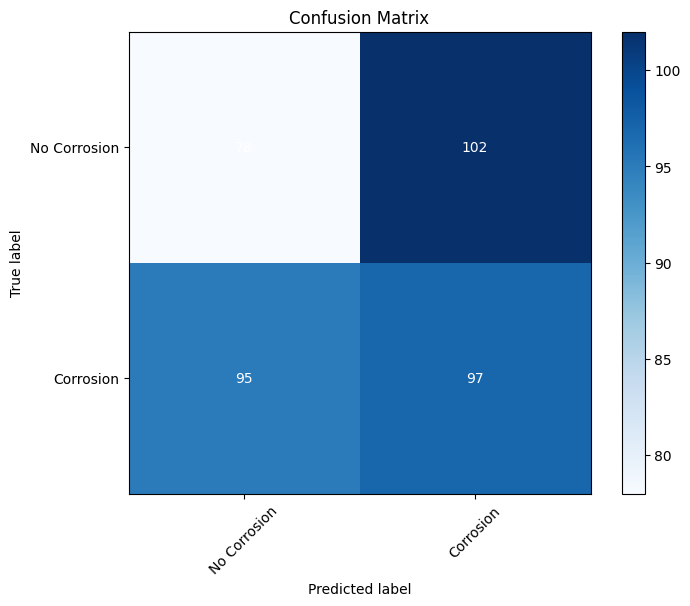

F1 Score: 0.4961636828644502
12/12 [==============================] - 24s 2s/step
KNN Accuracy: 0.46236559139784944


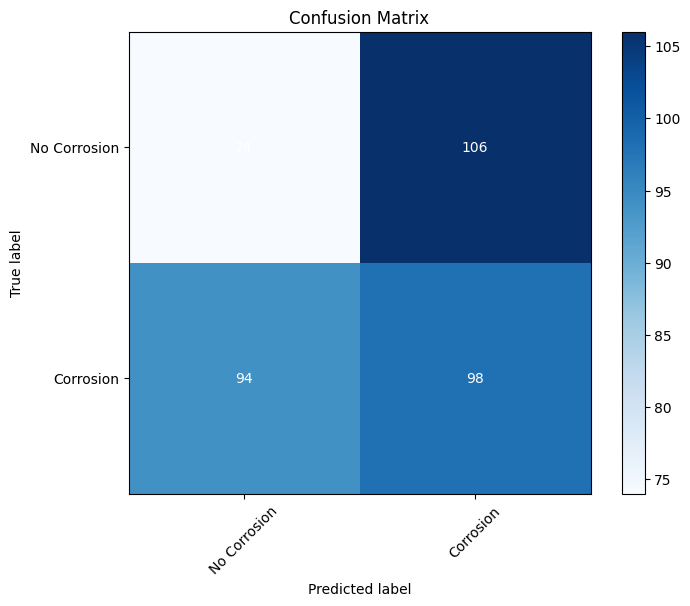

KNN F1 Score: 0.494949494949495


In [ ]:
# CNN + KNN Classifier

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract features from the last convolutional layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

# Extract features for training data
train_features = feature_extractor.predict(train_generator)

# Extract features for test data
test_features = feature_extractor.predict(test_generator)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(train_features, train_generator.classes)

# Evaluate the KNN classifier on test data
knn_accuracy = knn_classifier.score(test_features, test_generator.classes)
print(f'KNN Accuracy: {knn_accuracy}')

# Generate predictions using the KNN classifier
knn_predictions = knn_classifier.predict(test_features)

# Calculate the confusion matrix for KNN
knn_confusion = confusion_matrix(test_generator.classes, knn_predictions)

# Plot the confusion matrix for KNN
plot_confusion_matrix(knn_confusion, classes=class_names)

# Calculate and print F1 score for KNN
knn_f1 = f1_score(test_generator.classes, knn_predictions)
print(f'KNN F1 Score: {knn_f1}')


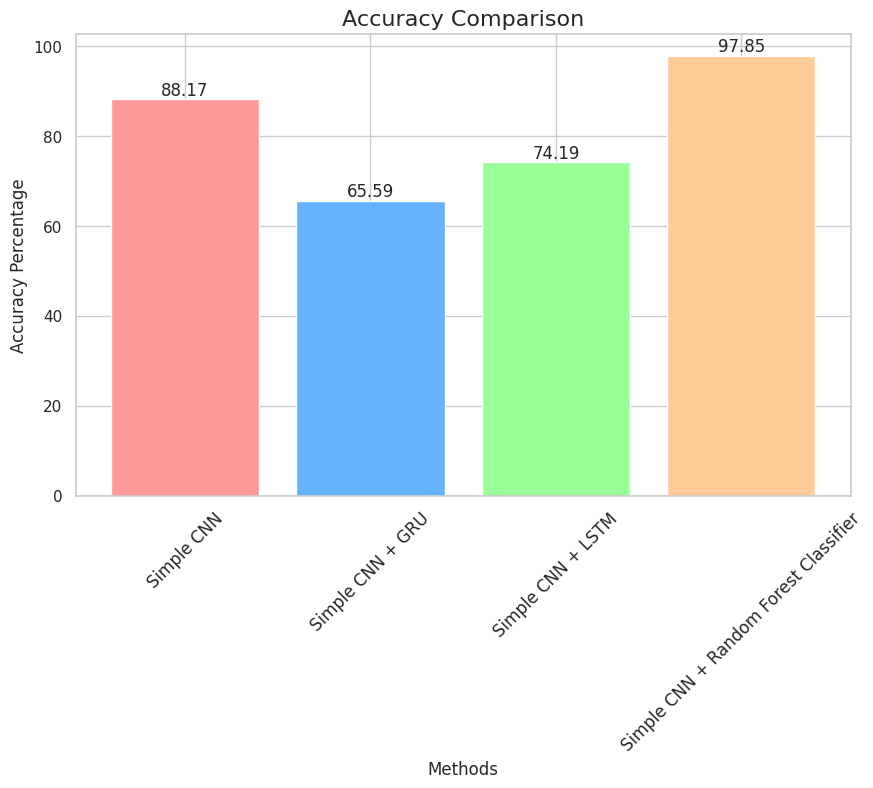

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your accuracy values)
methods = ['Simple CNN', 'Simple CNN + GRU', 'Simple CNN + LSTM', 'Simple CNN + Random Forest Classifier']
accuracy_percentages = [88.17, 65.59, 74.19, 97.85]

bar_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Custom colors for bars

plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar chart with custom colors
plt.bar(methods, accuracy_percentages, color=bar_colors)

# Add labels and title
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Accuracy Percentage', fontsize=12)
plt.title('Accuracy Comparison', fontsize=16)

# Add data values as text labels above each bar
for i in range(len(methods)):
    plt.text(i, accuracy_percentages[i], str(accuracy_percentages[i]), ha='center', va='bottom', fontsize=12)

# Customize the x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Show the bar chart
plt.show()


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 181s 3s/step - loss: 0.6788 - accuracy: 0.6295 - val_loss: 0.6474 - val_accuracy: 0.6737
Epoch 2/5
56/56 [==============================] - 199s 4s/step - loss: 0.4978 - accuracy: 0.7601 - val_loss: 0.5119 - val_accuracy: 0.7605
Epoch 3/5
56/56 [==============================] - 195s 3s/step - loss: 0.4089 - accuracy: 0.8187 - val_loss: 0.5505 - val_accuracy: 0.7421
Epoch 4/5
56/56 [==============================] - 194s 3s/step - loss: 0.3289 - accuracy: 0.8575 - val_loss: 0.6647 - val_accuracy: 0.7237
Epoch 5/5
56/56 [==============================] - 196s 3s/step - loss: 0.2480 - accuracy: 0.8998 - val_loss: 0.5172 - val_accuracy: 0.8211


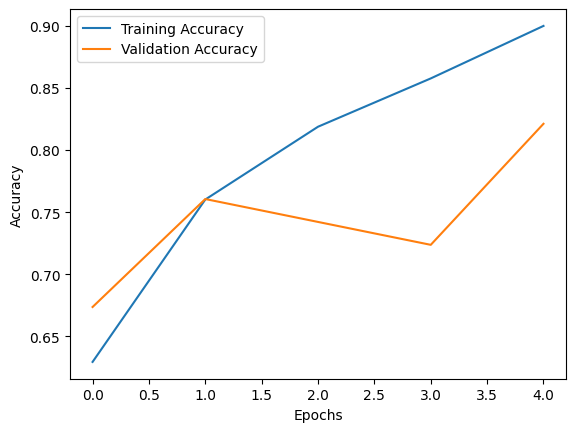

12/12 [==============================] - 26s 2s/step - loss: 0.4236 - accuracy: 0.8333
Test Loss: 0.4235677719116211
Test Accuracy: 0.8333333134651184
12/12 [==============================] - 26s 2s/step


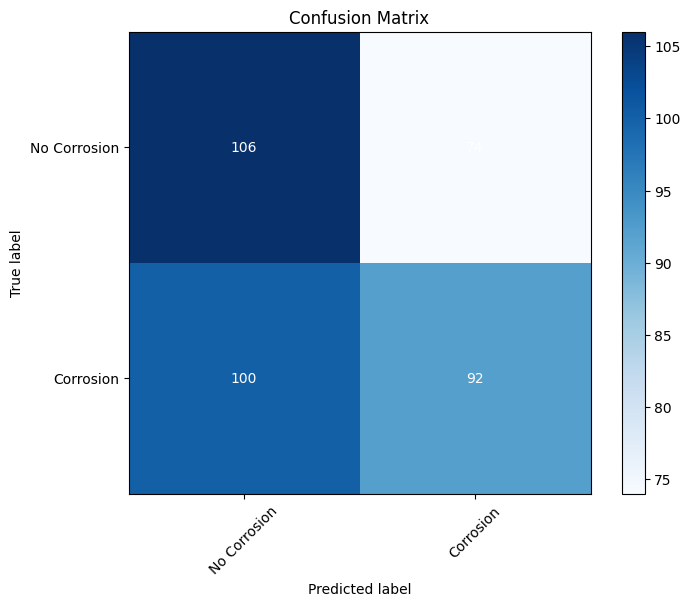

F1 Score: 0.5139664804469274
12/12 [==============================] - 24s 2s/step


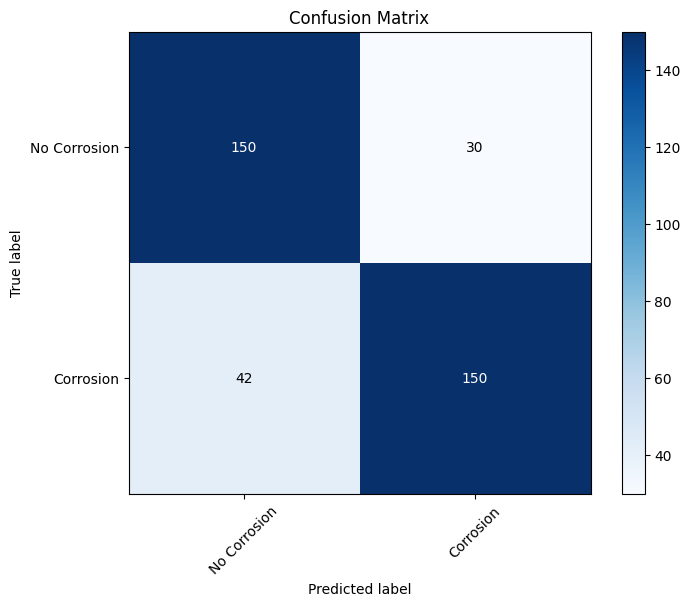

XGBoost F1 Score: 0.8064516129032259
XGBoost Accuracy: 80.65%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import xgboost as xgb  # Import XGBoost

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to XGBoost
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(cnn_features, y_true)

# Make predictions with the XGBoost classifier
xgb_predictions = xgb_classifier.predict(cnn_features)

# Calculate the confusion matrix for XGBoost predictions
xgb_confusion = confusion_matrix(y_true, xgb_predictions)

# Plot the XGBoost confusion matrix
plot_confusion_matrix(xgb_confusion, classes=class_names)

# Calculate and print F1 score for XGBoost
xgb_f1 = f1_score(y_true, xgb_predictions)
print(f'XGBoost F1 Score: {xgb_f1}')

# Calculate the accuracy of the XGBoost classifier
xgb_accuracy = accuracy_score(y_true, xgb_predictions)
xgb_accuracy_percentage = xgb_accuracy * 100.0

print(f'XGBoost Accuracy: {xgb_accuracy_percentage:.2f}%')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 200s 4s/step - loss: 0.6161 - accuracy: 0.6526 - val_loss: 0.5372 - val_accuracy: 0.7500
Epoch 2/5
56/56 [==============================] - 193s 3s/step - loss: 0.4319 - accuracy: 0.8035 - val_loss: 0.4571 - val_accuracy: 0.8105
Epoch 3/5
56/56 [==============================] - 192s 3s/step - loss: 0.3594 - accuracy: 0.8418 - val_loss: 0.4899 - val_accuracy: 0.8184
Epoch 4/5
56/56 [==============================] - 173s 3s/step - loss: 0.2847 - accuracy: 0.8840 - val_loss: 0.4410 - val_accuracy: 0.8211
Epoch 5/5
56/56 [==============================] - 194s 3s/step - loss: 0.2917 - accuracy: 0.8744 - val_loss: 0.6814 - val_accuracy: 0.7895


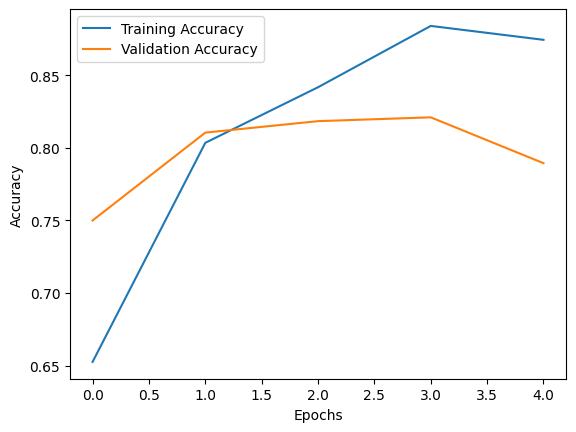

12/12 [==============================] - 25s 2s/step - loss: 0.5370 - accuracy: 0.7769
Test Loss: 0.5370199084281921
Test Accuracy: 0.7768816947937012
12/12 [==============================] - 25s 2s/step


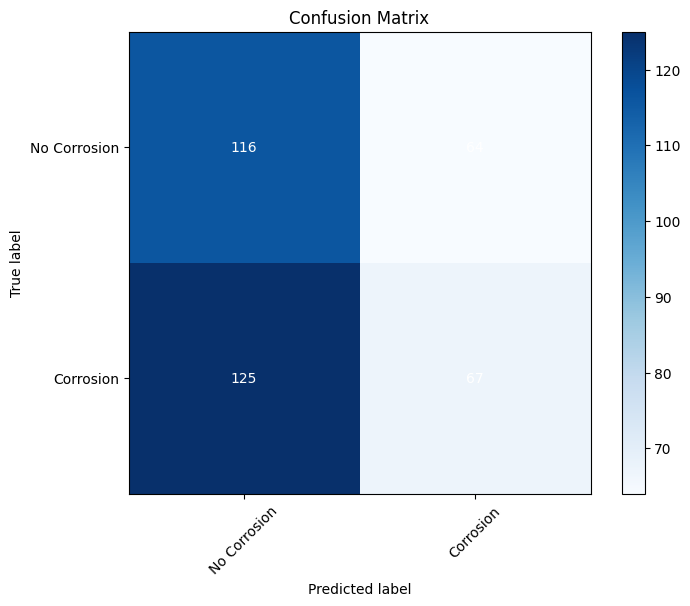

F1 Score: 0.41486068111455104
12/12 [==============================] - 25s 2s/step


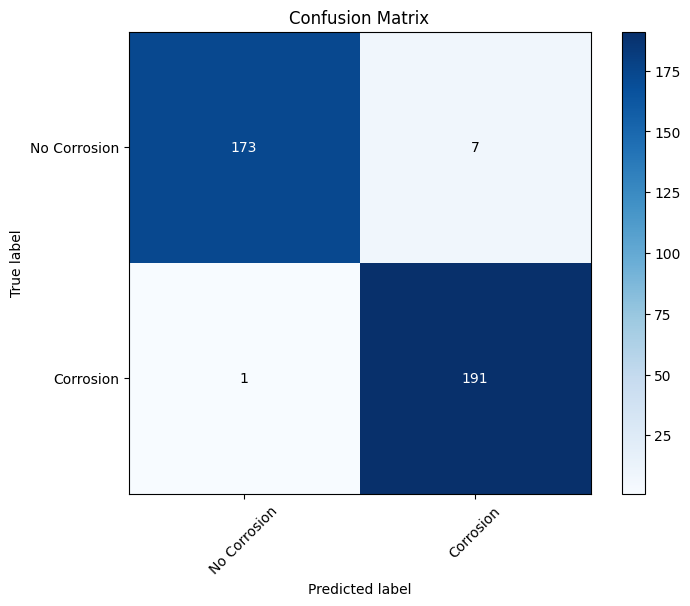

Extra Trees F1 Score: 0.9794871794871794
Extra Trees Accuracy: 97.85%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import ExtraTreesClassifier  # Import Extra Trees classifier

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Extra Trees
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train an Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(cnn_features, y_true)

# Make predictions with the Extra Trees classifier
et_predictions = extra_trees_classifier.predict(cnn_features)

# Calculate the confusion matrix for Extra Trees predictions
et_confusion = confusion_matrix(y_true, et_predictions)

# Plot the Extra Trees confusion matrix
plot_confusion_matrix(et_confusion, classes=class_names)

# Calculate and print F1 score for Extra Trees
et_f1 = f1_score(y_true, et_predictions)
print(f'Extra Trees F1 Score: {et_f1}')

# Calculate the accuracy of the Extra Trees classifier
et_accuracy = accuracy_score(y_true, et_predictions)
et_accuracy_percentage = et_accuracy * 100.0

print(f'Extra Trees Accuracy: {et_accuracy_percentage:.2f}%')


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 463s 8s/step - loss: 0.6725 - accuracy: 0.6492 - val_loss: 0.5582 - val_accuracy: 0.6974
Epoch 2/5
56/56 [==============================] - 197s 4s/step - loss: 0.4660 - accuracy: 0.8012 - val_loss: 0.6141 - val_accuracy: 0.7184
Epoch 3/5
56/56 [==============================] - 193s 3s/step - loss: 0.3811 - accuracy: 0.8401 - val_loss: 0.5190 - val_accuracy: 0.7684
Epoch 4/5
56/56 [==============================] - 187s 3s/step - loss: 0.3185 - accuracy: 0.8637 - val_loss: 0.6890 - val_accuracy: 0.7421
Epoch 5/5
56/56 [==============================] - 191s 3s/step - loss: 0.2408 - accuracy: 0.9037 - val_loss: 0.5967 - val_accuracy: 0.8053


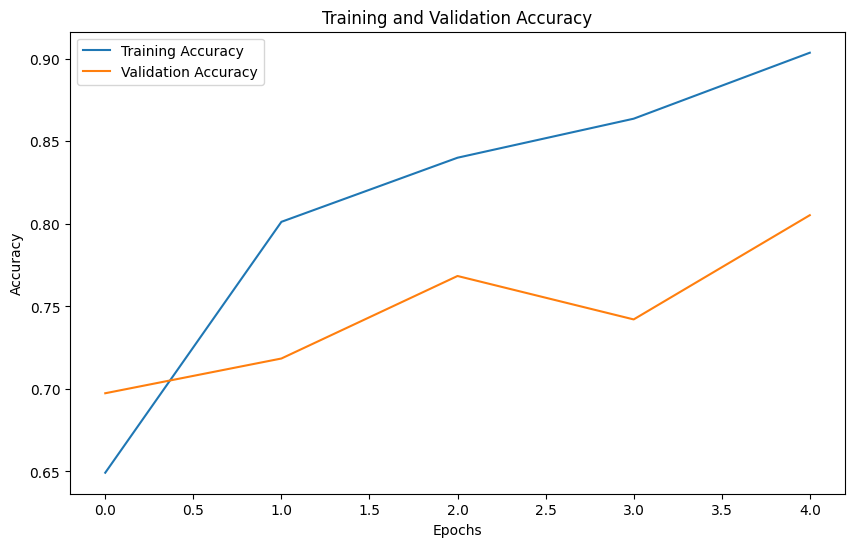

12/12 [==============================] - 114s 10s/step - loss: 0.3783 - accuracy: 0.8575
Test Loss: 0.3783193528652191
Test Accuracy: 0.8575268983840942
12/12 [==============================] - 22s 2s/step


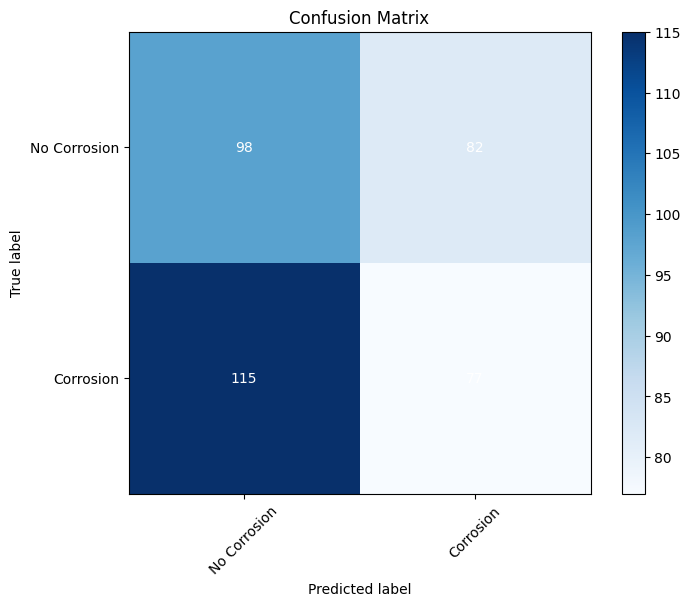

F1 Score: 0.4387464387464388
12/12 [==============================] - 22s 2s/step


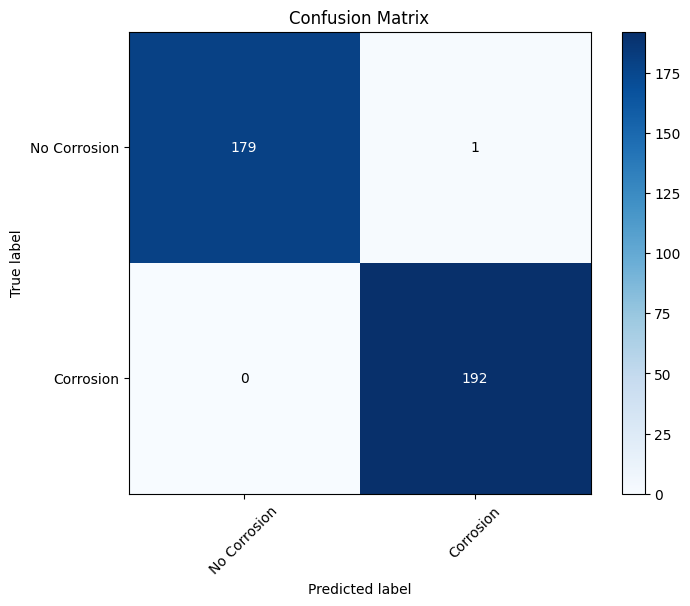

Extra Trees F1 Score: 0.9974025974025974
Extra Trees Accuracy: 99.73%


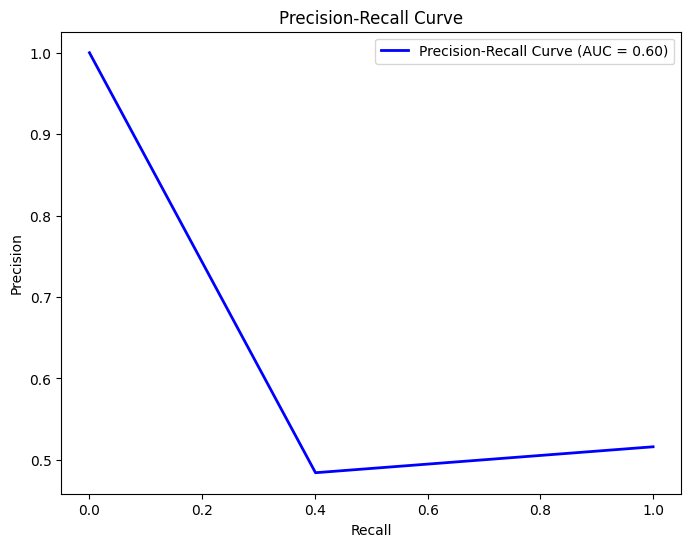

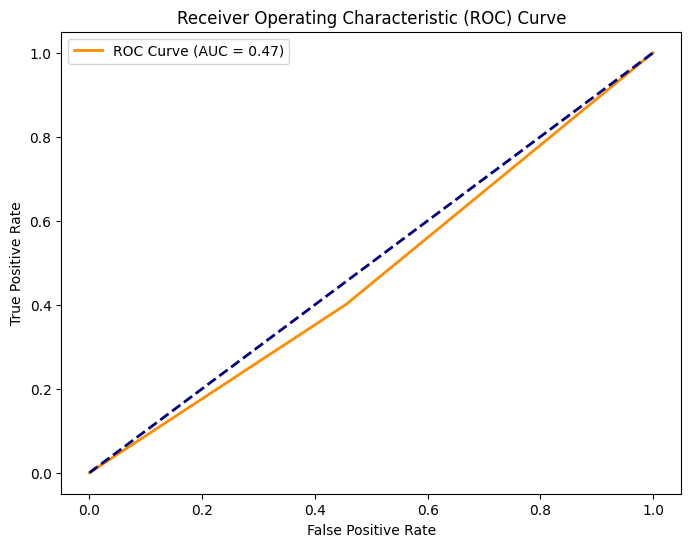

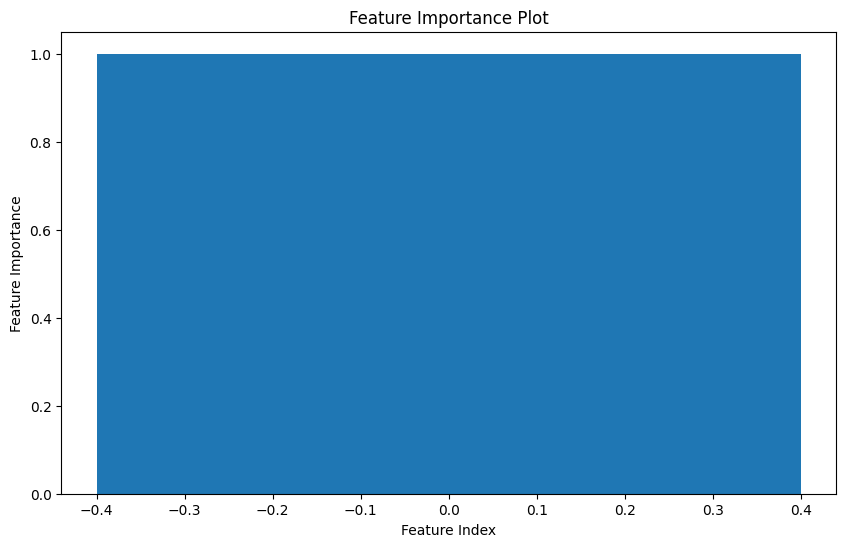

Classification Report:
              precision    recall  f1-score   support

No Corrosion       0.46      0.54      0.50       180
   Corrosion       0.48      0.40      0.44       192

    accuracy                           0.47       372
   macro avg       0.47      0.47      0.47       372
weighted avg       0.47      0.47      0.47       372



In [ ]:
# Extra Trees
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, auc, roc_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import ExtraTreesClassifier  # Import Extra Trees classifier

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Reshape CNN features for input to Extra Trees
cnn_features = model.predict(test_generator)
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train an Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(cnn_features, y_true)

# Make predictions with the Extra Trees classifier
et_predictions = extra_trees_classifier.predict(cnn_features)

# Calculate the confusion matrix for Extra Trees predictions
et_confusion = confusion_matrix(y_true, et_predictions)

# Plot the Extra Trees confusion matrix
plot_confusion_matrix(et_confusion, classes=class_names)

# Calculate and print F1 score for Extra Trees
et_f1 = f1_score(y_true, et_predictions)
print(f'Extra Trees F1 Score: {et_f1}')

# Calculate the accuracy of the Extra Trees classifier
et_accuracy = accuracy_score(y_true, et_predictions)
et_accuracy_percentage = et_accuracy * 100.0
print(f'Extra Trees Accuracy: {et_accuracy_percentage:.2f}%')

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Feature Importance Plot
feature_importances = extra_trees_classifier.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(cnn_features.shape[1]), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 495s 9s/step - loss: 0.6696 - accuracy: 0.6109 - val_loss: 0.6233 - val_accuracy: 0.6447
Epoch 2/5
56/56 [==============================] - 178s 3s/step - loss: 0.5215 - accuracy: 0.7427 - val_loss: 0.5192 - val_accuracy: 0.7605
Epoch 3/5
56/56 [==============================] - 197s 4s/step - loss: 0.3861 - accuracy: 0.8232 - val_loss: 0.4284 - val_accuracy: 0.8132
Epoch 4/5
56/56 [==============================] - 189s 3s/step - loss: 0.3665 - accuracy: 0.8412 - val_loss: 0.6643 - val_accuracy: 0.7316
Epoch 5/5
12/12 [==============================] - 123s 11s/step - loss: 0.3845 - accuracy: 0.8817
Test Loss: 0.3845309317111969
Test Accuracy: 0.8817204236984253


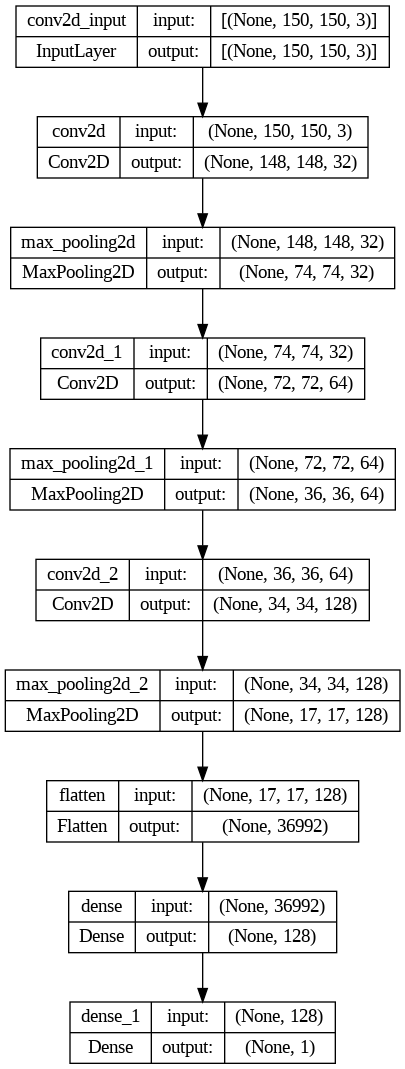

In [ ]:
# Visualize Simple CNN - Augmented

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the model plot
Image("model_plot.png")


Found 1776 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Epoch 1/5
56/56 [==============================] - 205s 4s/step - loss: 0.6771 - accuracy: 0.6425 - val_loss: 0.5455 - val_accuracy: 0.7474
Epoch 2/5
56/56 [==============================] - 169s 3s/step - loss: 0.4924 - accuracy: 0.7607 - val_loss: 0.5015 - val_accuracy: 0.7711
Epoch 3/5
56/56 [==============================] - 194s 3s/step - loss: 0.4109 - accuracy: 0.8204 - val_loss: 0.6919 - val_accuracy: 0.6763
Epoch 4/5
56/56 [==============================] - 184s 3s/step - loss: 0.3245 - accuracy: 0.8660 - val_loss: 0.5260 - val_accuracy: 0.8026
Epoch 5/5
12/12 [==============================] - 29s 2s/step - loss: 0.4860 - accuracy: 0.8226
Test Loss: 0.4860115051269531
Test Accuracy: 0.8225806355476379
12/12 [==============================] - 22s 2s/step


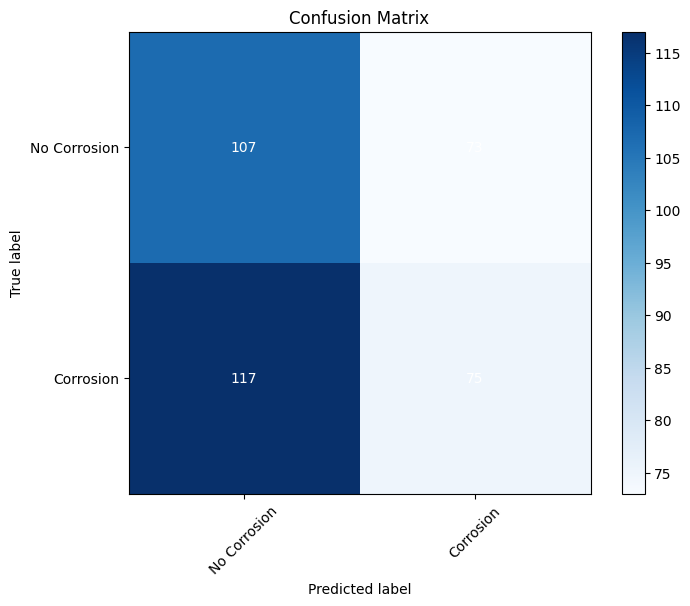

F1 Score: 0.4411764705882353
12/12 [==============================] - 23s 2s/step
[LightGBM] [Info] Number of positive: 192, number of negative: 180
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.516129 -> initscore=0.064539
[LightGBM] [Info] Start training from score 0.064539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

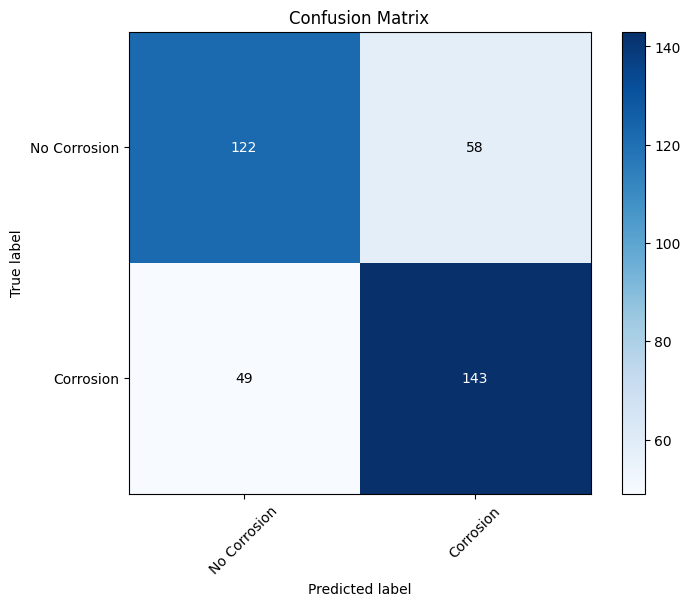

LightGBM F1 Score: 0.727735368956743
LightGBM Accuracy: 71.24%


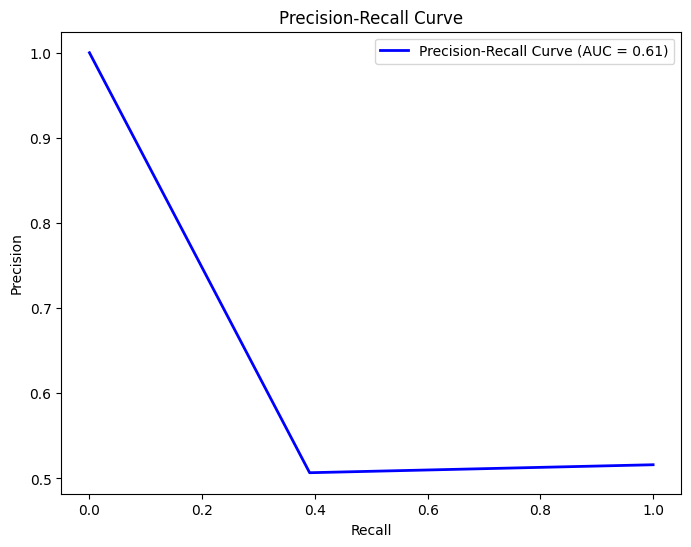

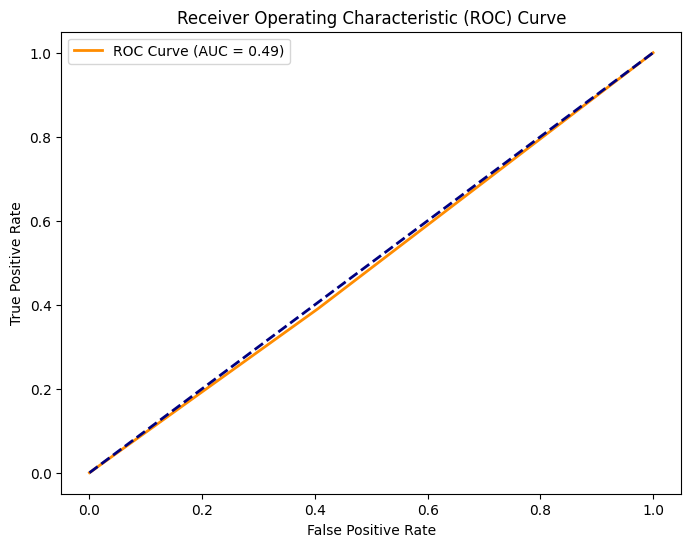

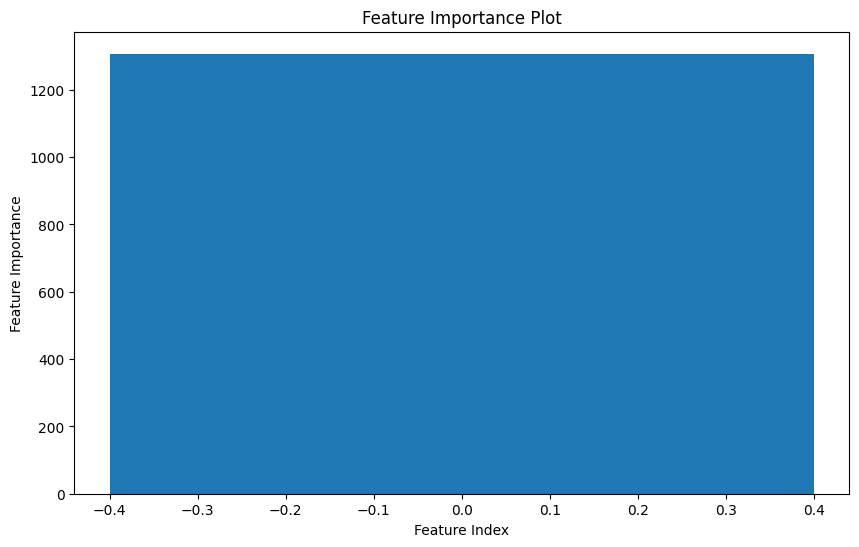

Classification Report:
              precision    recall  f1-score   support

No Corrosion       0.48      0.59      0.53       180
   Corrosion       0.51      0.39      0.44       192

    accuracy                           0.49       372
   macro avg       0.49      0.49      0.49       372
weighted avg       0.49      0.49      0.48       372



In [ ]:
# LightGBM
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, auc, roc_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import lightgbm as lgb  # Import LightGBM

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/train'
validation_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/validate'
test_data_dir = '/content/drive/MyDrive/Corrosion Detection/data inc/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['No Corrosion', 'Corrosion']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Reshape CNN features for input to LightGBM
cnn_features = model.predict(test_generator)
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_classifier.fit(cnn_features, y_true)

# Make predictions with the LightGBM classifier
lgb_predictions = lgb_classifier.predict(cnn_features)

# Calculate the confusion matrix for LightGBM predictions
lgb_confusion = confusion_matrix(y_true, lgb_predictions)

# Plot the LightGBM confusion matrix
plot_confusion_matrix(lgb_confusion, classes=class_names)

# Calculate and print F1 score for LightGBM
lgb_f1 = f1_score(y_true, lgb_predictions)
print(f'LightGBM F1 Score: {lgb_f1}')

# Calculate the accuracy of the LightGBM classifier
lgb_accuracy = accuracy_score(y_true, lgb_predictions)
lgb_accuracy_percentage = lgb_accuracy * 100.0
print(f'LightGBM Accuracy: {lgb_accuracy_percentage:.2f}%')

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Feature Importance Plot
feature_importances = lgb_classifier.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(cnn_features.shape[1]), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


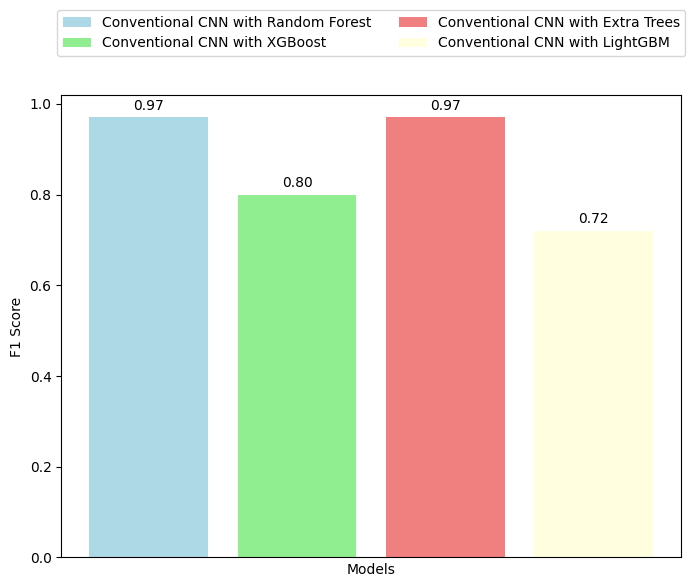

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# F1 scores for four models
model_names = ['Conventional CNN with Random Forest', 'Conventional CNN with XGBoost', 'Conventional CNN with Extra Trees', 'Conventional CNN with LightGBM']
f1_scores = [0.97, 0.80, 0.97, 0.72]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(model_names)), f1_scores, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Customize the plot
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show the F1 scores on top of the bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

# Remove x-axis ticks
plt.xticks([])

# Add legends above the plot
plt.legend(bars, model_names, bbox_to_anchor=(0.5, 1.20), loc='upper center', ncol=2)

# Show the plot
plt.show()